In [1]:
#Association Goals: Identify common traits of diabetics

In [ ]:
!pip install mlxtend

In [3]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
import mlxtend
from mlxtend.frequent_patterns import apriori, association_rules

In [4]:
df = pd.read_csv("cleaned_diabetes.csv") # this path is generalized, please input original local file path here
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00,188.79,33.6,0.627,50,1
1,1,85.0,66.0,29.00,51.48,26.6,0.351,31,0
2,8,183.0,64.0,18.15,255.30,23.3,0.672,32,1
3,1,89.0,66.0,23.00,94.00,28.1,0.167,21,0
4,0,137.0,40.0,35.00,168.00,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.00,180.00,32.9,0.171,63,0
764,2,122.0,70.0,27.00,184.85,36.8,0.340,27,0
765,5,121.0,72.0,23.00,112.00,26.2,0.245,30,0
766,1,126.0,60.0,26.04,146.71,30.1,0.349,47,1


In [5]:
#Binning: Convert numerical variables into categorical bins as Apriori works with categorical data

def pregnancies_categories(preg):
    if preg == 0:
        return 'No Pregnancy'
    elif 1 <= preg <= 2:
        return 'Low Pregnancies'
    elif 3 <= preg <= 5:
        return 'Moderate Pregnancies'
    else:
        return 'High Pregnancies'

def glucose_categories(glucose):
    if glucose < 140:
        return 'Normal Glucose' 
    elif 140 <= glucose < 200: 
        return 'High Glucose'
    else: 
        return 'Very High Glucose'

def bp_categories(bp):
    if bp < 80: 
        return 'Normal BP' 
    elif 80 <= bp < 90: 
        return 'High-Normal BP' 
    else: 
        return 'High BP'

def skinthickness_categories(skin): 
    if skin <= 10: 
        return 'Very Low' 
    elif 11 <= skin <= 20: 
        return 'Low' 
    elif 21 <= skin <= 30: 
        return 'Medium' 
    elif 31 <= skin <= 40: 
        return 'High' 
    else: 
        return 'Very High'

def insulin_categories(insulin): 
    if insulin <= 30: 
        return 'Low'
    elif 31 <= insulin <= 60: 
        return 'Normal' 
    elif 61 <= insulin <= 100: 
        return 'Elevated' 
    else: 
        return 'High'

def bmi_categories(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi < 25:
        return 'Normal'
    elif 25 <= bmi < 30:
        return 'Overweight'
    else:
        return 'Obese'

def dpf_categories(dpf):
    if dpf <= 0.24: 
        return 'Low Genetic Risk' 
    elif 0.25 <= dpf <= 0.49: 
        return 'Moderate Genetic Risk' 
    elif 0.50 <= dpf <= 0.99: 
        return 'High Genetic Risk' 
    else: 
        return 'Very High Genetic Risk'

def age_categories(age):
    if 18 <= age <= 34:
        return 'Young Adult'  
    elif 35 <= age <= 49:
        return 'Middle-aged'  
    elif 50 <= age <= 64:
        return 'Senior'  
    else:
        return 'Elderly' 

df['Pregnancies_Level'] = df['Pregnancies'].apply(pregnancies_categories)
df['Glucose_level'] = df['Glucose'].apply(glucose_categories)
df['BP_Level'] = df['BloodPressure'].apply(bp_categories)
df['ST_Level'] = df['SkinThickness'].apply(skinthickness_categories)
df['Insulin_Level'] = df['Insulin'].apply(insulin_categories)
df['Obesity_Level'] = df['BMI'].apply(bmi_categories)
df['DPF_Level'] = df['DiabetesPedigreeFunction'].apply(dpf_categories)
df['Age_Level'] = df['Age'].apply(age_categories)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Pregnancies_Level,Glucose_level,BP_Level,ST_Level,Insulin_Level,Obesity_Level,DPF_Level,Age_Level
0,6,148.0,72.0,35.00,188.79,33.6,0.627,50,1,High Pregnancies,High Glucose,Normal BP,High,High,Obese,High Genetic Risk,Senior
1,1,85.0,66.0,29.00,51.48,26.6,0.351,31,0,Low Pregnancies,Normal Glucose,Normal BP,Medium,Normal,Overweight,Moderate Genetic Risk,Young Adult
2,8,183.0,64.0,18.15,255.30,23.3,0.672,32,1,High Pregnancies,High Glucose,Normal BP,Low,High,Normal,High Genetic Risk,Young Adult
3,1,89.0,66.0,23.00,94.00,28.1,0.167,21,0,Low Pregnancies,Normal Glucose,Normal BP,Medium,Elevated,Overweight,Low Genetic Risk,Young Adult
4,0,137.0,40.0,35.00,168.00,43.1,2.288,33,1,No Pregnancy,Normal Glucose,Normal BP,High,High,Obese,Very High Genetic Risk,Young Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.00,180.00,32.9,0.171,63,0,High Pregnancies,Normal Glucose,Normal BP,Very High,High,Obese,Low Genetic Risk,Senior
764,2,122.0,70.0,27.00,184.85,36.8,0.340,27,0,Low Pregnancies,Normal Glucose,Normal BP,Medium,High,Obese,Moderate Genetic Risk,Young Adult
765,5,121.0,72.0,23.00,112.00,26.2,0.245,30,0,Moderate Pregnancies,Normal Glucose,Normal BP,Medium,High,Overweight,Very High Genetic Risk,Young Adult
766,1,126.0,60.0,26.04,146.71,30.1,0.349,47,1,Low Pregnancies,Normal Glucose,Normal BP,Medium,High,Obese,Moderate Genetic Risk,Middle-aged


In [6]:
df.dtypes

Pregnancies                   int64
Glucose                     float64
BloodPressure               float64
SkinThickness               float64
Insulin                     float64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
Pregnancies_Level            object
Glucose_level                object
BP_Level                     object
ST_Level                     object
Insulin_Level                object
Obesity_Level                object
DPF_Level                    object
Age_Level                    object
dtype: object

In [7]:
df['Outcome'] = df['Outcome'].map({0: False, 1: True})
df[['Outcome']].head()

,Outcome
0,True
1,False
2,True
3,False
4,True


In [8]:
df.dtypes

Pregnancies                   int64
Glucose                     float64
BloodPressure               float64
SkinThickness               float64
Insulin                     float64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                        bool
Pregnancies_Level            object
Glucose_level                object
BP_Level                     object
ST_Level                     object
Insulin_Level                object
Obesity_Level                object
DPF_Level                    object
Age_Level                    object
dtype: object

In [9]:
df_diabetic = df[df['Outcome'] == True]
df_diabetic

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Pregnancies_Level,Glucose_level,BP_Level,ST_Level,Insulin_Level,Obesity_Level,DPF_Level,Age_Level
0,6,148.0,72.0,35.00,188.7900,33.6,0.627,50,True,High Pregnancies,High Glucose,Normal BP,High,High,Obese,High Genetic Risk,Senior
2,8,183.0,64.0,18.15,255.3000,23.3,0.672,32,True,High Pregnancies,High Glucose,Normal BP,Low,High,Normal,High Genetic Risk,Young Adult
4,0,137.0,40.0,35.00,168.0000,43.1,2.288,33,True,No Pregnancy,Normal Glucose,Normal BP,High,High,Obese,Very High Genetic Risk,Young Adult
6,3,78.0,50.0,32.00,88.0000,31.0,0.248,26,True,Moderate Pregnancies,Normal Glucose,Normal BP,High,Elevated,Obese,Very High Genetic Risk,Young Adult
8,2,197.0,70.0,45.00,353.1125,30.5,0.158,53,True,Low Pregnancies,High Glucose,Normal BP,Very High,High,Obese,Low Genetic Risk,Senior
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
755,1,128.0,88.0,39.00,110.0000,36.5,1.057,37,True,Low Pregnancies,Normal Glucose,High-Normal BP,High,High,Obese,Very High Genetic Risk,Middle-aged
757,0,123.0,72.0,34.79,307.0600,36.3,0.258,52,True,No Pregnancy,Normal Glucose,Normal BP,High,High,Obese,Moderate Genetic Risk,Senior
759,6,190.0,92.0,50.31,353.1125,35.5,0.278,66,True,High Pregnancies,High Glucose,High BP,Very High,High,Obese,Moderate Genetic Risk,Elderly
761,9,170.0,74.0,31.00,223.4400,44.0,0.403,43,True,High Pregnancies,High Glucose,Normal BP,High,High,Obese,Moderate Genetic Risk,Middle-aged


In [10]:
mean_outcome = df['Outcome'].mean()
mean_outcome

0.3489583333333333

In [11]:
association_inputs = df[['BP_Level','Obesity_Level','DPF_Level','Age_Level','Outcome']]
association_inputs

,BP_Level,Obesity_Level,DPF_Level,Age_Level,Outcome
0,Normal BP,Obese,High Genetic Risk,Senior,True
1,Normal BP,Overweight,Moderate Genetic Risk,Young Adult,False
2,Normal BP,Normal,High Genetic Risk,Young Adult,True
3,Normal BP,Overweight,Low Genetic Risk,Young Adult,False
4,Normal BP,Obese,Very High Genetic Risk,Young Adult,True
...,...,...,...,...,...
763,Normal BP,Obese,Low Genetic Risk,Senior,False
764,Normal BP,Obese,Moderate Genetic Risk,Young Adult,False
765,Normal BP,Overweight,Very High Genetic Risk,Young Adult,False
766,Normal BP,Obese,Moderate Genetic Risk,Middle-aged,True


In [12]:
association_inputs = df[['BP_Level','Obesity_Level','DPF_Level','Age_Level','Outcome']]
association_inputs

,BP_Level,Obesity_Level,DPF_Level,Age_Level,Outcome
0,Normal BP,Obese,High Genetic Risk,Senior,True
1,Normal BP,Overweight,Moderate Genetic Risk,Young Adult,False
2,Normal BP,Normal,High Genetic Risk,Young Adult,True
3,Normal BP,Overweight,Low Genetic Risk,Young Adult,False
4,Normal BP,Obese,Very High Genetic Risk,Young Adult,True
...,...,...,...,...,...
763,Normal BP,Obese,Low Genetic Risk,Senior,False
764,Normal BP,Obese,Moderate Genetic Risk,Young Adult,False
765,Normal BP,Overweight,Very High Genetic Risk,Young Adult,False
766,Normal BP,Obese,Moderate Genetic Risk,Middle-aged,True


In [13]:
# Convert categorical features into one-hot encoding
df_encoded = pd.get_dummies(association_inputs)

# Ensure all values are boolean (1 for presence, 0 for absence)
df_encoded = df_encoded.astype(bool)

# Run the Apriori algorithm
frequent_itemsets = apriori(df_encoded, min_support=0.01, use_colnames=True)
frequent_itemsets.head(10)

,support,itemsets
0,0.348958,(Outcome)
1,0.078125,(BP_Level_High BP)
2,0.188802,(BP_Level_High-Normal BP)
3,0.733073,(BP_Level_Normal BP)
4,0.132812,(Obesity_Level_Normal)
5,0.628906,(Obesity_Level_Obese)
6,0.233073,(Obesity_Level_Overweight)
7,0.292969,(DPF_Level_High Genetic Risk)
8,0.247396,(DPF_Level_Low Genetic Risk)
9,0.359375,(DPF_Level_Moderate Genetic Risk)


In [14]:
# Generate association rules from the frequent itemsets
rules = association_rules(df=frequent_itemsets, metric='confidence', min_threshold=0.70)

#Display the rules
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(Outcome),(Obesity_Level_Obese),0.348958,0.628906,0.287760,0.824627,1.311208,1.0,0.068298,2.116024,0.364561,0.416981,0.527416,0.641092
1,(BP_Level_High BP),(Obesity_Level_Obese),0.078125,0.628906,0.058594,0.750000,1.192547,1.0,0.009460,1.484375,0.175141,0.090361,0.326316,0.421584
2,(BP_Level_High-Normal BP),(Obesity_Level_Obese),0.188802,0.628906,0.144531,0.765517,1.217220,1.0,0.025792,1.582606,0.219990,0.214700,0.368131,0.497665
3,(Obesity_Level_Normal),(BP_Level_Normal BP),0.132812,0.733073,0.110677,0.833333,1.136767,1.0,0.013316,1.601562,0.138739,0.146552,0.375610,0.492155
4,(Obesity_Level_Overweight),(BP_Level_Normal BP),0.233073,0.733073,0.191406,0.821229,1.120256,1.0,0.020547,1.493123,0.139970,0.247059,0.330263,0.541165
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,"(BP_Level_Normal BP, DPF_Level_Very High Genet...",(Age_Level_Young Adult),0.023438,0.635417,0.018229,0.777778,1.224044,1.0,0.003337,1.640625,0.187429,0.028455,0.390476,0.403233
140,"(BP_Level_Normal BP, DPF_Level_Very High Genet...",(Obesity_Level_Obese),0.020833,0.628906,0.018229,0.875000,1.391304,1.0,0.005127,2.968750,0.287234,0.028866,0.663158,0.451993
141,"(DPF_Level_Very High Genetic Risk, Age_Level_Y...",(BP_Level_Normal BP),0.023438,0.733073,0.018229,0.777778,1.060983,1.0,0.001048,1.201172,0.058857,0.024691,0.167480,0.401322
142,"(DPF_Level_Very High Genetic Risk, Age_Level_Y...","(BP_Level_Normal BP, Obesity_Level_Obese)",0.026042,0.425781,0.018229,0.700000,1.644037,1.0,0.007141,1.914063,0.402215,0.042042,0.477551,0.371407


In [15]:
rules_filtered = rules[rules['consequents'].apply(lambda x: 'Outcome' in x)]

rules_filtered

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
76,"(BP_Level_Normal BP, Age_Level_Senior, Obesity...",(Outcome),0.026042,0.348958,0.018229,0.700000,2.005970,1.0,0.009142,2.170139,0.514897,0.051095,0.5392,0.376119
88,"(Age_Level_Middle-aged, Obesity_Level_Obese, D...",(Outcome),0.041667,0.348958,0.031250,0.750000,2.149254,1.0,0.016710,2.604167,0.557971,0.086957,0.6160,0.419776
90,"(Age_Level_Senior, Obesity_Level_Obese, DPF_Le...",(Outcome),0.019531,0.348958,0.016927,0.866667,2.483582,1.0,0.010111,4.882812,0.609255,0.048148,0.7952,0.457587


In [16]:
print(f"Total number of filtered rules: {rules_filtered.shape[0]}")
pd.set_option('display.max_colwidth', None)
rules_filtered = rules_filtered.sort_values(by=['confidence'], ascending=[False])
rules_filtered

Total number of filtered rules: 3


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
90,"(Age_Level_Senior, Obesity_Level_Obese, DPF_Level_High Genetic Risk)",(Outcome),0.019531,0.348958,0.016927,0.866667,2.483582,1.0,0.010111,4.882812,0.609255,0.048148,0.7952,0.457587
88,"(Age_Level_Middle-aged, Obesity_Level_Obese, DPF_Level_High Genetic Risk)",(Outcome),0.041667,0.348958,0.031250,0.750000,2.149254,1.0,0.016710,2.604167,0.557971,0.086957,0.6160,0.419776
76,"(BP_Level_Normal BP, Age_Level_Senior, Obesity_Level_Obese)",(Outcome),0.026042,0.348958,0.018229,0.700000,2.005970,1.0,0.009142,2.170139,0.514897,0.051095,0.5392,0.376119


C:\Users\joann\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(
C:\Users\joann\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(
C:\Users\joann\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(


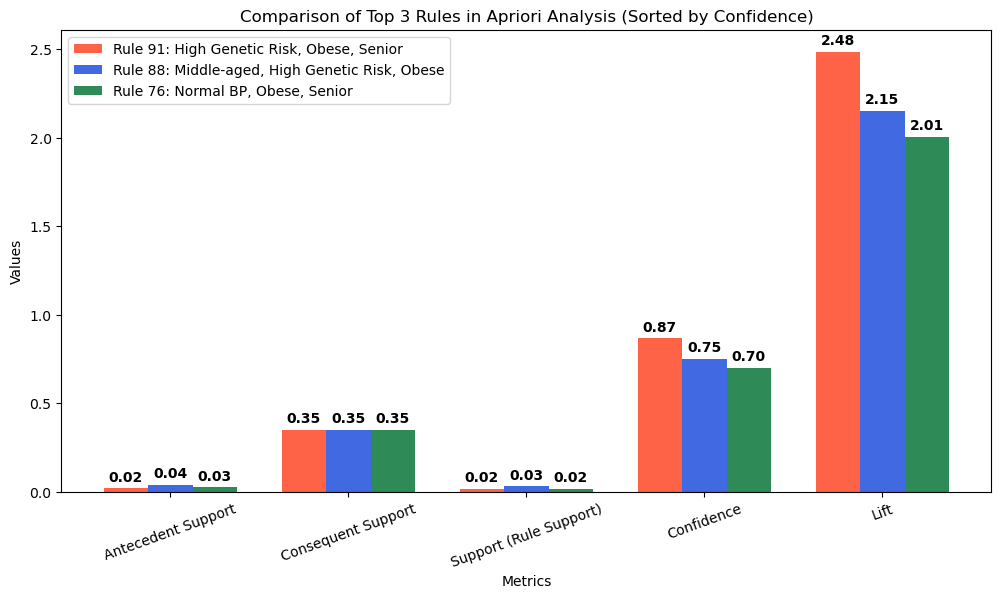

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Simulating the filtered rules dataset based on previous observations
data = {
    'Rule': ['Rule 76: Normal BP, Obese, Senior', 
             'Rule 88: Middle-aged, High Genetic Risk, Obese', 
             'Rule 91: High Genetic Risk, Obese, Senior'],
    'Antecedent Support': [0.026042, 0.041667, 0.019531],
    'Consequent Support': [0.348958, 0.348958, 0.348958],
    'Support (Rule Support)': [0.018229, 0.031250, 0.016927],
    'Confidence': [0.700000, 0.750000, 0.866667],
    'Lift': [2.005970, 2.149254, 2.483582]
}

# Convert data to DataFrame and sort by confidence (as in your code)
rules_filtered_df = pd.DataFrame(data)
rules_filtered_df = rules_filtered_df.sort_values(by=['Confidence'], ascending=[False])

# Extracting data for visualization
metrics = ['Antecedent Support', 'Consequent Support', 'Support (Rule Support)', 'Confidence', 'Lift']
rule_1_values = rules_filtered_df.iloc[0, 1:].values  # Highest confidence rule
rule_2_values = rules_filtered_df.iloc[1, 1:].values  # Second highest confidence rule
rule_3_values = rules_filtered_df.iloc[2, 1:].values  # Third highest confidence rule

# Set positions for bars
x = np.arange(len(metrics))
width = 0.25

# Create the bar chart
fig, ax = plt.subplots(figsize=(12, 6))
bars1 = ax.bar(x - width, rule_1_values, width, label=rules_filtered_df.iloc[0, 0], color='tomato')
bars2 = ax.bar(x, rule_2_values, width, label=rules_filtered_df.iloc[1, 0], color='royalblue')
bars3 = ax.bar(x + width, rule_3_values, width, label=rules_filtered_df.iloc[2, 0], color='seagreen')

# Add labels and title
ax.set_xlabel('Metrics')
ax.set_ylabel('Values')
ax.set_title('Comparison of Top 3 Rules in Apriori Analysis (Sorted by Confidence)')
ax.set_xticks(x)
ax.set_xticklabels(metrics, rotation=20)
ax.legend()

# Display values on bars
for bars in [bars1, bars2, bars3]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # Offset above bar
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=10, fontweight='bold')

# Show the plot
plt.show()


In [18]:
# Association rules validation
senior_obese_high_risk = df_diabetic[
    (df_diabetic["Age_Level"] == "Senior") & 
    (df_diabetic["Obesity_Level"] == "Obese") & 
    (df_diabetic["DPF_Level"] == "High Genetic Risk")
]

middle_obese_high_risk = df_diabetic[
    (df_diabetic["Age_Level"] == "Middle-aged") & 
    (df_diabetic["Obesity_Level"] == "Obese") & 
    (df_diabetic["DPF_Level"] == "High Genetic Risk")
]

senior_obese_normal_bp = df_diabetic[
    (df_diabetic["Age_Level"] == "Senior") & 
    (df_diabetic["Obesity_Level"] == "Obese") & 
    (df_diabetic["BP_Level"] == "Normal BP")
]

# Compute Glucose and Insulin category distributions for each group in df_diabetic
validation_results_diabetic = pd.DataFrame({
    "Group": ["Senior, Obese, High Genetic Risk", "Middle-aged, Obese, High Genetic Risk", "Senior, Obese, Normal BP"],
    "High Glucose (%)": [
        (senior_obese_high_risk["Glucose_level"].isin(["High Glucose", "Very High Glucose"])).mean() * 100,
        (middle_obese_high_risk["Glucose_level"].isin(["High Glucose", "Very High Glucose"])).mean() * 100,
        (senior_obese_normal_bp["Glucose_level"].isin(["High Glucose", "Very High Glucose"])).mean() * 100,
    ],
    "High Insulin (%)": [
        (senior_obese_high_risk["Insulin_Level"].isin(["Elevated", "High"])).mean() * 100,
        (middle_obese_high_risk["Insulin_Level"].isin(["Elevated", "High"])).mean() * 100,
        (senior_obese_normal_bp["Insulin_Level"].isin(["Elevated", "High"])).mean() * 100,
    ]
})
# Re-import ace_tools in case it was reset

# Alternative: Display results without using ace_tools (tools)
print("\nDiabetic Association Rule Validation:")
print(validation_results_diabetic.to_string(index=False))


Diabetic Association Rule Validation:
                                Group  High Glucose (%)  High Insulin (%)
     Senior, Obese, High Genetic Risk         84.615385             100.0
Middle-aged, Obese, High Genetic Risk         50.000000             100.0
             Senior, Obese, Normal BP         64.285714             100.0


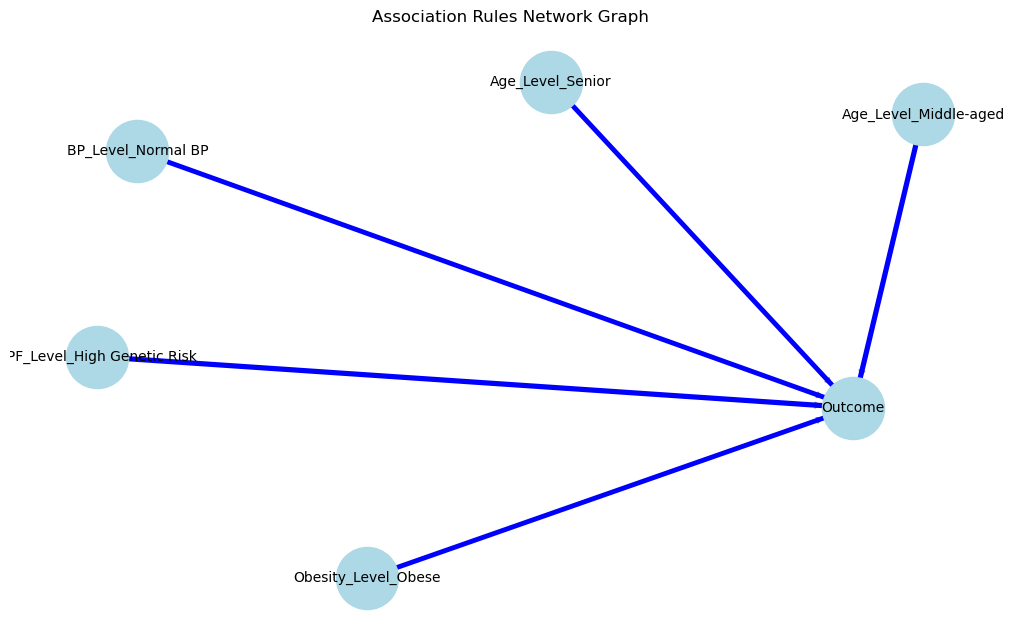

In [19]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a directed graph
G = nx.DiGraph()

# Add nodes and edges from filtered rules
for _, row in rules_filtered.iterrows():
    antecedents = row['antecedents']
    consequent = list(row['consequents'])[0]  # Assuming only 1 consequent (Outcome)
    
    for antecedent in antecedents:
        G.add_edge(antecedent, consequent, weight=row['confidence'])  # Edge weight = confidence

# Draw the graph
plt.figure(figsize=(10, 6))
pos = nx.spring_layout(G, seed=42)  # Layout for better spacing
edges = G.edges(data=True)

# Draw nodes
nx.draw(G, pos, with_labels=True, node_color="lightblue", edge_color="gray", node_size=2000, font_size=10)

# Draw edges with thickness proportional to confidence
edge_widths = [d['weight'] * 5 for (u, v, d) in edges]  # Scale confidence for visualization
nx.draw_networkx_edges(G, pos, edgelist=edges, width=edge_widths, edge_color="blue")

plt.title("Association Rules Network Graph")
plt.show()